# Assignment Briefing
1) Dataset Description:

The original dataset is in a format that is difficult for beginners to use. This dataset uses the work of Joseph Redmon to provide the MNIST dataset in a CSV format.

The dataset consists of two files:

mnist_train.csv
mnist_test.csv
The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).


2) The Tasks:
    
- Your first task is to use Keras and develop a model that correctly detects a handwritten digit. Though you can technically solve that task with any type of a supervised model, please use neural networks. You are free to experiment with the architecture of the model. Note that this is a multi-class classification task.
- Please evaluate your model properly and interpret its performance.

# Exploratory Analysis

## Importing data from csv to dataframe for train and test sets

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Preparation and Cleaning

In [4]:
X_train=train.drop(labels=["label"],axis=1)
Y_train=train["label"]

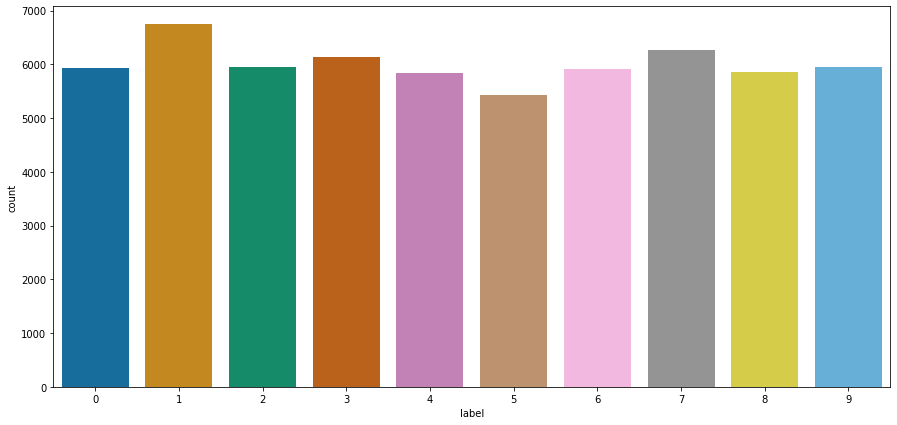

In [5]:
plt.figure(figsize=(15,7))
g=sns.countplot(Y_train,palette="colorblind")

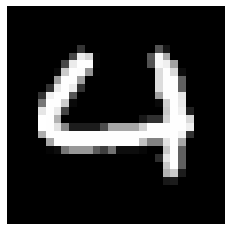

In [6]:
img = X_train.iloc[60].values.reshape(28,28)
img.shape
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [7]:
Y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

## Normalization

In [8]:
X_test=test.drop(labels=["label"],axis=1)
Y_test=test["label"]

In [9]:
# Normalize pixel values to be between 0 and 1
X_train=X_train/255.0
X_test=X_test/255.0
print("X_train: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train:  (60000, 784)
X_test shape:  (10000, 784)


## Reshape

In [10]:
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


## Label Encoding

In [11]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)

In [12]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
Y_test=to_categorical(Y_test,num_classes=10)

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)
print("x_train: ",X_train.shape)
print("x_test: ",X_val.shape)
print("y_train: ",Y_train.shape)
print("x_test: ",Y_val.shape)

x_train:  (54000, 28, 28, 1)
x_test:  (6000, 28, 28, 1)
y_train:  (54000, 10)
x_test:  (6000, 10)


# Constructing Deep Learning Model

## Convolutional Neural Networks Model

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
batch_size=32
epochs=100

In [16]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=5,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           vertical_flip=False)
datagen.fit(X_train)

## Fit Model

In [17]:
history=model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(X_val,Y_val),
                            steps_per_epoch=1600//batch_size)

Epoch 1/100
50/50 [==============================] - 21s 98ms/step - loss: 2.2639 - accuracy: 0.1728 - val_loss: 1.5143 - val_accuracy: 0.5828
Epoch 2/100
50/50 [==============================] - 4s 79ms/step - loss: 1.5513 - accuracy: 0.4512 - val_loss: 0.6882 - val_accuracy: 0.7923
Epoch 3/100
50/50 [==============================] - 4s 79ms/step - loss: 1.0643 - accuracy: 0.6354 - val_loss: 0.4190 - val_accuracy: 0.8705
Epoch 4/100
50/50 [==============================] - 4s 79ms/step - loss: 0.7944 - accuracy: 0.7312 - val_loss: 0.3350 - val_accuracy: 0.9027
Epoch 5/100
50/50 [==============================] - 4s 79ms/step - loss: 0.7120 - accuracy: 0.7793 - val_loss: 0.2633 - val_accuracy: 0.9253
Epoch 6/100
50/50 [==============================] - 4s 79ms/step - loss: 0.5461 - accuracy: 0.8100 - val_loss: 0.2077 - val_accuracy: 0.9367
Epoch 7/100
50/50 [==============================] - 4s 79ms/step - loss: 0.4756 - accuracy: 0.8442 - val_loss: 0.2132 - val_accuracy: 0.9303
Epoch

# Evaluate the Model

##Compare accuracy between validation and train dataset

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


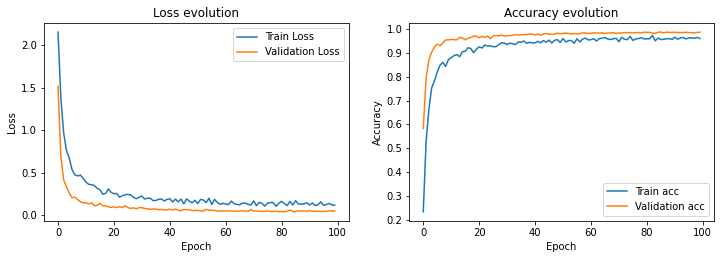

In [18]:
print(history.history.keys())

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy evolution')
plt.show()

We can see from the chart above that after around 60 epochs, our model has been trained quite thoroughly where the subsequent loss value decreases and accuracy gains are minimal. ALso, we can observe that both loss value and accuracy is better on the validation than the main train set, i.e. our model is not over-fitted.

##Evaluation on the test dataset

In [19]:
evaluation = model.evaluate(X_test, Y_test)
print(f'Test Accuracy : {evaluation[1]:.4f}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0334 - accuracy: 0.9882
Test Accuracy : 0.9882


It turns out that the accuracy on the test dataset is even better than the best accuracy score reached on the validation dataset (part of the training dataset). This means that this model is robust and generalized well to perform equally good on new, previously unseen inputs than on the training data.

##Makes predictions
With the model trained, we can use it to make predictions about some images.

In [20]:
# get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [21]:
test_img = X_test[0]
prediction = model.predict(X_test)
prediction[0]

array([3.2065234e-16, 3.7838879e-10, 3.8451986e-10, 3.3302042e-11,
       3.0497957e-14, 3.8481289e-16, 9.3409607e-23, 1.0000000e+00,
       4.0395349e-15, 3.9493200e-10], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different digits. We can see which label has the highest confidence value:

In [22]:
np.argmax(prediction[0])

7

So, the model is most confident that this image represents the digit 7. Examining the test label shows that this classification is correct:

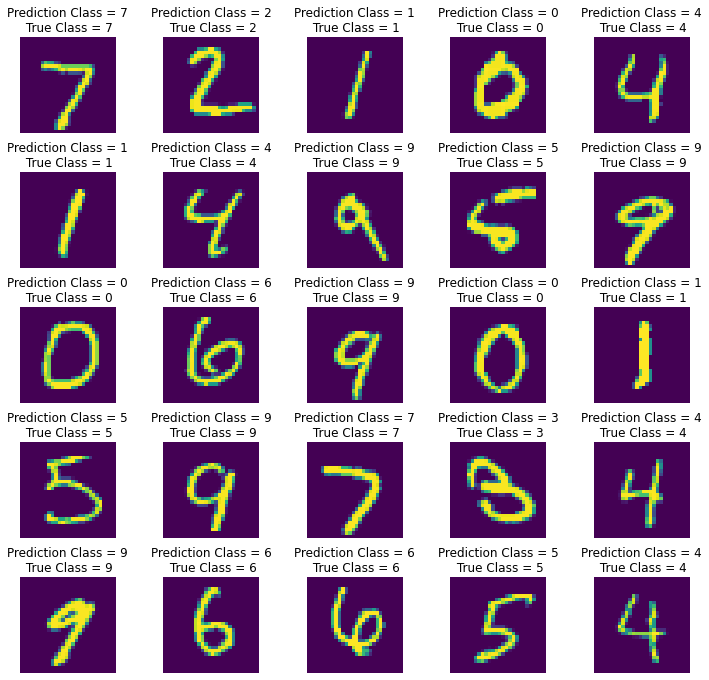

In [23]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {np.array(test, dtype='float32')[:,0][i]:0.0f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

## Classification Evaluation Tools: Confusion Matrix and Classification Report

With the predictions we made with the model from the previous step, we can apply the Confusion Matrix and Classification Report to see how the model performs on test cases.

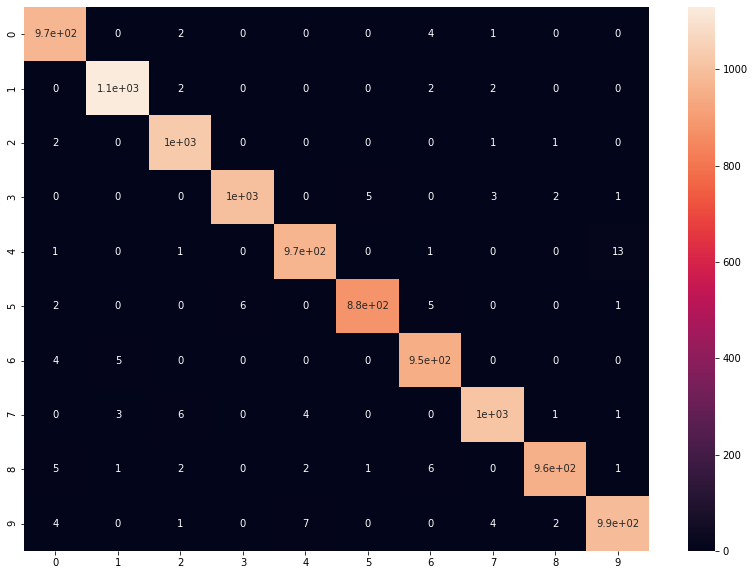

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(test, dtype='float32')[:,0], predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

From the Confusion Matrix, it is apparent that the model performs outstandingly. Rooms for further improvements are on the predictions made for Digit 4 and 9 when the model often mixes these two together, as well the model incorrectly classfies images for digit 5 as for 3 or 6.

In [25]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(np.array(test, dtype='float32')[:,0], predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       0.99      0.98      0.99       982
     Class 5       0.99      0.98      0.99       892
     Class 6       0.98      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       0.99      0.98      0.99       974
     Class 9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Reading from the Classification Report, we come to almost identical conclusion as from the Confusion Matrix. The recall for class 4, 5, 8 and 9 can be improved.

# Model Limitations

- Our model is performing well on this dataset but not guaranteed for other similar ones.

- This dataset has been highly standardized, so our model may not perform well with low-quality data.

- The predictions are always limitied to efficiency of:
    - Data Cleaning Algorithms
    - Image Data Generator Algorithms
    - Prediction Algorithm

- To achieve the results on this model, we utilize advanced mechanisms to augment the data by generating extra training cases with transformed images from the original images. This process is computationally expensive, so it is also a trade-off we need to make.